# Laboratorio Optimización No. 9

> Daniel Alvarez - 201911320  
Maria Jose Vieda - 201923359

### Importacion de Librerias:

In [95]:
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import LinearLocator
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import sympy as sym

- Primer punto

In [2]:
# definicion de matrices A1, ..., A4
A1 = np.array([[1, 0],[0, 3]])
A2 = np.array([[-9, 0],[0, -9]])
A3 = np.array([[1, 5],[5, 1]])
A4 = np.array([[5, 1],[1, 5]])

In [81]:
# se define el tamaño de la grilla con las divisiones de estas

u = np.linspace(-25,25,100)
x, y = np.meshgrid(u,u)

# x.shape

In [4]:
# se define una función que retorne la funcion cuadratica dada
# una matriz de la forma f(x) = x^T * Q * x
# donde x es un vector de n variables independientes para este caso n = 0
# con parametros x -> variable independiente, A = Q
def f(x, A):
    return np.dot(np.dot(x.T, A),x)

- a.

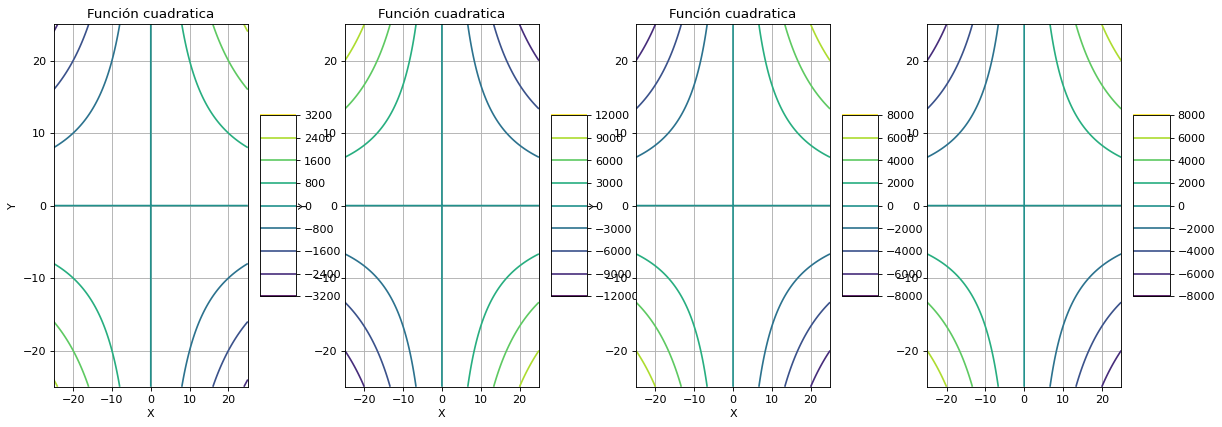

In [89]:
# se define una figura para afectar su tamaño y densidad pixeles
figure(figsize=(18, 6), dpi=80)
plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
# se crea un arreglo de graficas para ocupar los contornos de la 4 matrices
plt.subplot(1,4,1)
ax = plt.contour(x, y, f(x[0:2,:], A1))
plt.colorbar(ax, shrink=0.5, aspect=5)

plt.grid()
plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,2)
ax = plt.contour(x, y, f(x[0:2,:], A2))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,3)
ax = plt.contour(x, y, f(x[0:2,:], A3))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

plt.title("Función cuadratica")
plt.xlabel("X")
plt.ylabel("Y")
plt.subplot(1,4,4)
ax = plt.contour(x, y, f(x[0:2,:], A4))
plt.colorbar(ax, shrink=0.5, aspect=5)
plt.grid()

- b.

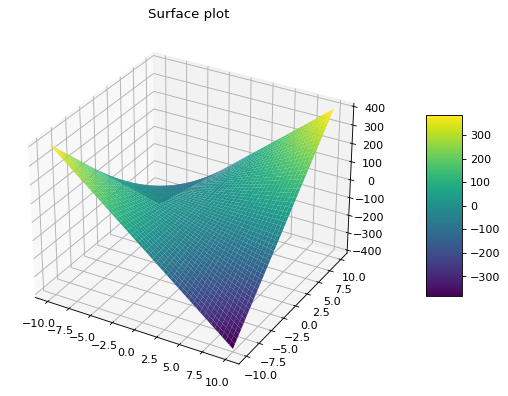

In [77]:
# se crea una funcion para graficar una superficie
# con parametro la matriz Q
def graph_surface(A):
    # se define la figura
    fig = plt.figure(figsize=(18, 6), dpi=80)
    # se define como una proyección de un espacio 3D
    ax = plt.axes(projection='3d')
    # se crea la superficie usado f(x, A) donde A = Q
    surf = ax.plot_surface(x, y, f(x[0:2,:], A),cmap='viridis', edgecolor='none')
    ax.set_title('Surface plot')
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

# se hace uso de la función 
# variar 
# A1-A2-A3-A4

graph_surface(A1)

- c.

In [10]:
# se encuentran los valores propios de todas las matrices asociadas
lam1 = np.linalg.eigvals(A1)
lam2 = np.linalg.eigvals(A2)
lam3 = np.linalg.eigvals(A3)
lam4 = np.linalg.eigvals(A4)

> Los valores y vectores propios se relacionan debido a que estos se ajustan a la superficie y las características de esta, es decir, a las curvas de nivel de la gráfica. Cabe resaltar que, cuando se obtienen valores propios con el mismo signo ya sea positivo o negativo la figura resultante es cóncava (hacia arriba en caso positivo y hacia abajo en cado negativo). Por otro lado, los valores propios permiten evidenciar la nueva orientación de los ejes esto ligado a los ángulos a los que se encuentren, de los cuales un vector propio con mayor magnitud conlleva a una longitud más grande en las curvas de las figuras que se muestran en los siguientes puntos.  

> En particular, los valores propios son las raíces reales (raíces que tienen como solución números reales) que encontramos mediante la ecuación característica de la matriz, en particular estos valores son los coeficientes de los vectores que ante cualquier rotación del sistema no cambian.

- Segundo Punto

In [91]:
# se define un vector con los valores de rho en un vector 
rho = np.array([0, 0.25, -0.25, 0.75, -0.75, 1, -1, 2, -2])
# se crea una función creator de para generar matrices
# m = [[1,rho],[rho, 1]] 
# la funcion tiene como parametro el vector v = [rho_1, rho_2, ..., rho_n]
def creator(v):
    # se crea un vector de 3D
    A_rho = np.zeros((2, 2, len(v)))
    # se recorre el vector para la construccion del vector 3D
    for i in range(len(v)):
        # se crea la i-ésima matriz del el arreglo 3D 
        A_rho[:, :, i] = np.array([[1, v[i]],[v[i],1]])
    # se retorna este arreglo 3D
    return A_rho

A_rho = creator(rho)

- a.

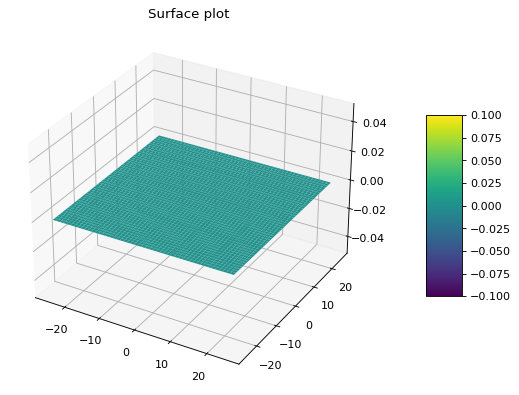

In [93]:
# se crea una función que construya la superficie dada la matriz  A_rho
# parametro -> j contador de arreglo 3D
def graph_rho(j):
    # se crea el espacio de la figura
    fig = plt.figure(figsize=(18, 6), dpi=80)
    ax = plt.axes(projection='3d')
    # se plotea la superficie dada por la i-ésima matriz A_rho = Q
    surf = ax.plot_surface(x, y, f(x[0:2,:], A_rho[:,:,j]),cmap='viridis', edgecolor='none')
    ax.set_title('Surface plot')
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

graph_rho(6)

- b.

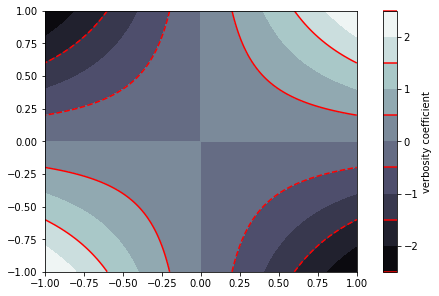

In [70]:
# se define una función contourf para plotear la superficie de contorno
# parametros -> j (contador del arreglo 3D), flag (bandera de activación de matriz A_rho), en 
# caso de que no se active la bandera A = Q 
def sel_contourf(j, flag, A):
    if flag:
        # se define un origen [0, 0]
        origin = 'lower'
        fig1, ax2 = plt.subplots(constrained_layout=True)
        # se plotea las curvas superficiales de nivel
        CS = ax2.contourf(x, y, f(x[0:2,:], A_rho[:,:,j]), 10, cmap=plt.cm.bone, origin=origin)
        CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)
        cbar = fig1.colorbar(CS)
        cbar.ax.set_ylabel('verbosity coefficient')
        # Add the contour line levels to the colorbar
        cbar.add_lines(CS2)
    else:
        origin = 'lower'
        fig1, ax2 = plt.subplots(constrained_layout=True)
        CS = ax2.contourf(x, y, f(x[0:2,:], A), 10, cmap=plt.cm.bone, origin=origin)
        CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='r', origin=origin)
        cbar = fig1.colorbar(CS)
        cbar.ax.set_ylabel('verbosity coefficient')
        # Add the contour line levels to the colorbar
        cbar.add_lines(CS2)

# indice 1, bandera activa para A_rho, ninguno

sel_contourf(1, 1, None)

- c.

In [22]:
# se definen las matrices para los autovectores y autovalores.
autovettori2 = np.zeros((2, 2, len(rho)))
autovalori2 = np.zeros((2,len(rho)))
# se define la obtención de los valores y vectores propios en 
# el i-ésimo arreglo en 3D se recorre encontrando todos estos 
for i in range(len(rho)):
    autovalori2[:,i], autovettori2[:,:,i] = np.linalg.eig(A_rho[:, :, i])

- Tercer Punto

In [94]:
# se define la función para la obtencion de los valores propios 
# se tiene un parametro A, del cual se obtenienen los vectores propios
# se normalizan diviendolos entre la norma euclidiana, obteniendo vectores ortonormales
def norm_eig(A):
    autovalori, autovettori = np.linalg.eig(A)
    v = np.zeros((autovettori.shape))
    for j in range(len(autovettori[:,0])):
        # se divide en la norma
        v[:,j] = autovettori[:,j]/np.linalg.norm(autovettori[:,j])
    return autovalori, v

- a. 

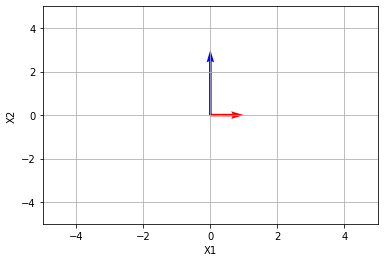

In [61]:
# se aplica la función realizada

[la1, v1] = norm_eig(A1)
[la2, v2] = norm_eig(A2)
[la3, v3] = norm_eig(A3)
[la4, v4] = norm_eig(A4)

# prueba
# c0 = np.linalg.norm(v1[:,0])
# c1 = np.linalg.norm(v1[:,-1])
# c2 = np.linalg.norm(v2[:,0])
# c3 = np.linalg.norm(v2[:,-1])
# c4 = np.linalg.norm(v3[:,0])
# c5 = np.linalg.norm(v3[:,-1])
# c6 = np.linalg.norm(v4[:,0])
# c7 = np.linalg.norm(v4[:,-1])

# se define una funcion graficacion de vectores
# se recibe como parametro vector propio y el valor 
# re retorna la grafica
def graph_norm(lamb, m_vector):
    soa = m_vector
    origin = np.array([[0, 0],[0, 0]]) # origin point
    plt.figure()
    # se grafica los vectores propios multiplicados por sus respectivos valores 
    plt.quiver(*origin, lamb[0]*soa[:,0], lamb[-1]*soa[:,-1], angles='xy', scale_units='xy', color=['r','b','g'], scale=1)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid()
    plt.show()  

# se varia los lambdas y los vectores propios

graph_norm(la1,v1)

- b.

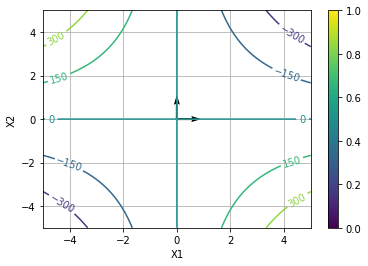

In [63]:
# se crea una función que grafique los vectores 
# propios y las curvas de nivel de la funcion 
# dada por el parametro de la matriz A = Q
def b_3(A):
    origin = np.array([[0, 0],[0, 0]]) # origin point
    x1 = np.linspace(-5.0, 5.0, 100)
    x2 = np.linspace(-5.0, 5.0, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = np.sqrt(np.square(X1) + np.square(X2))
    # se grafica el contorno 
    cp = plt.contour(X1, X2, f(X1[0:2,:], A))
    [B1, B2] = norm_eig(A)
    # se grafican los vectores
    plt.quiver(*origin, B2[:,0], B2[:,-1],units='xy' ,scale=1)
    plt.clabel(cp, inline=1, fontsize=10)
    plt.grid()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar()
    plt.show()

# Definimos la función
# variar 
# A1-A2-A3-A4

b_3(A2)

- Cuarto Punto

> Con una nueva función cuadrática se implementaron las tres funciones plot surface, contour y contourf, usadas en los literales anteriores de forma que se evidenciaran con mayor claridad el funcionamiento de cada una sobre los problemas cuadráticos.  
> La expresión dada es la siguiente:
$$q(x,y) = 4x^{2} + 2xy - 3y^{2}$$
> Acotando la siguiente matriz Q:
$$Q = \begin{bmatrix}4 & 1\\ 1& -3\end{bmatrix}$$

In [68]:
# se denota la siguiente matriz
Q = np.array([[4,1],[1,-3]])

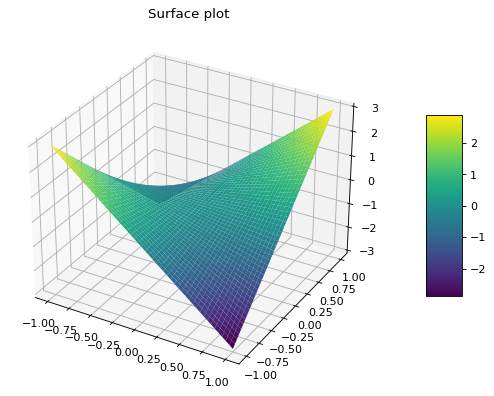

In [69]:
# se usa la función de graficación de superficie
graph_surface(Q)

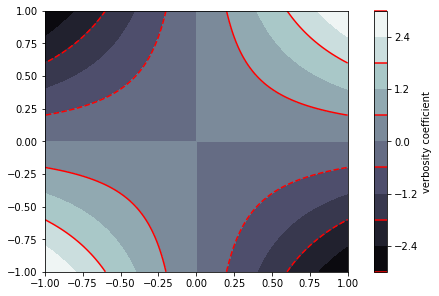

In [71]:
# se usa la función de graficación de contornos de superficie (bandera A_rho = False)
sel_contourf(1, 0, Q)

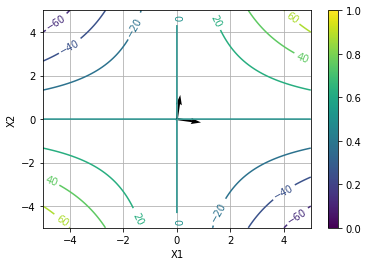

(array([ 4.14005494, -3.14005494]),
 array([[ 0.99033427, -0.13870121],
        [ 0.13870121,  0.99033427]]))

In [74]:
# se grafica las curvas de nivel con los vectores propios asociados 
# a la matriz parametro en este caso Q
h = norm_eig(Q)
b_3(Q)
h

- Quinto Punto

> Nótese que si tomamos la región de forma tal que abarque solo la frontera tendremos:
$$\textit{D} =\{(x, y): \frac{x^2}{4}+\frac{y^2}{9}-25=0\}$$
> Se nos solicita encontrar una función 
$$Q_{i}(x,y) = 0 / (x, y) \in \textit{D}$$  
> Por lo tanto, igualamos las funciones teniendo en cuenta que ambas son iguales 0, obteniendo:
$$Q_{1}(x,y) = \frac{x^2}{4}+\frac{y^2}{9}-25$$
> Donde la expresión representa un elipsoide, que corta con el plano en la región, indicando que:
$$Q_{1} > 0 \;\; \forall (x,y) \in D $$
$$Q_{1} < 0 \;\; \forall (x,y) \notin D $$
> Para este caso se cumple que la función complementaria en su imagen que cumple con las condiciones:
$$Q_{2} < 0 \;\; \forall (x,y) \in D $$
$$Q_{2} > 0 \;\; \forall (x,y) \notin D $$
> Cumpliendo que:
$$Q_{1} = - Q_{2}$$
> Obtenemos:
$$Q_{2} = -\frac{x^2}{4}-\frac{y^2}{9}+25$$
> Obteneniendo la siguiente representación matricial, partiendo de:
$$Q_{i} = x^{T}Ux + K$$
> Donde:
$$ x^{T} = [x_{1}, x_{2}, ..., x_{n}] \therefore n \in [1,i]$$
$$Q_{1} = x^{T}U_{1}x - 25$$
> Con $U_{1}$
$$U_{1} = \begin{bmatrix}1/4&0\\0&1/9\end{bmatrix}$$
> Para $Q_{2}$, tenemos:
$$Q_{2} = x^{T}U_{2}x + 25$$
> Con $U_{2}$
$$U_{2} = \begin{bmatrix}-1/4&0\\0&-1/9\end{bmatrix}$$
> Una vez con estas matrices de funciones cuadraticas podemos obtener los datos solicitados.

In [78]:
# definimos las dos matrices de los sistemas
U1 = np.array([[1/4, 0],[0, 1/9]])
U2 = np.array([[-1/4, 0],[0, -1/9]])

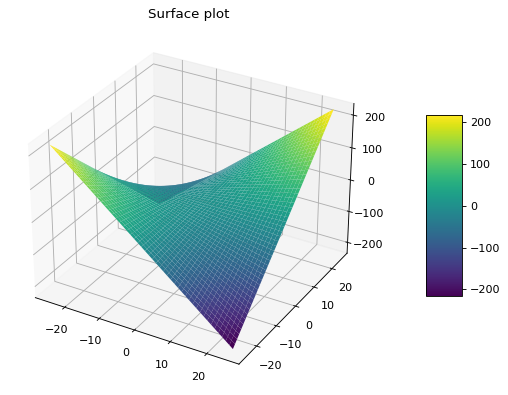

In [82]:
# se usa la función de graficación en 3D
graph_surface(U1)

C:\Users\danie\AppData\Local\Temp\ipykernel_16364\1398758299.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


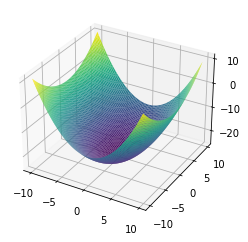

In [102]:
# grafica con el offset (-25)

fig = plt.figure()

# Tomo el eje actual y defino una proyección 3D
ax = plt.gca(projection='3d')

# Dibujo 3D
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)

# el metodo meshgrid devuelve una matriz de coordenadas
# a partir de vectores de coordendas, que usamos para
# los datos del eje Z
X, Y = np.meshgrid(X, Y)
Z = X**2/4 + Y**2/9 -25
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

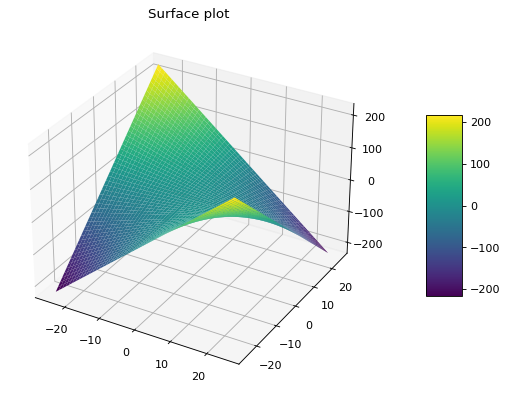

In [83]:
# se usa la función de graficación en 3D
graph_surface(U2)

C:\Users\danie\AppData\Local\Temp\ipykernel_16364\2985533205.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


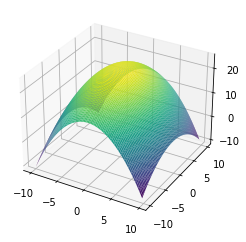

In [103]:
# grafica con el offset (25)

fig = plt.figure()

# Tomo el eje actual y defino una proyección 3D
ax = plt.gca(projection='3d')

# Dibujo 3D
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)

# el metodo meshgrid devuelve una matriz de coordenadas
# a partir de vectores de coordendas, que usamos para
# los datos del eje Z
X, Y = np.meshgrid(X, Y)
Z = -X**2/4 + -Y**2/9 +25
surface = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

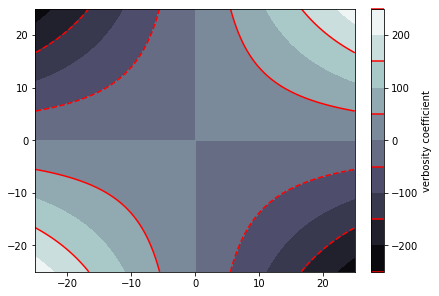

In [84]:
# se usa la función de graficación de contornos de superficie (bandera A_rho = False)
sel_contourf(1, 0, U1)

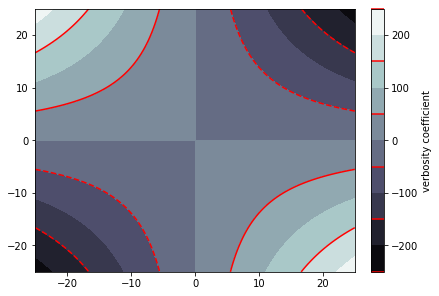

In [86]:
# se usa la función de graficación de contornos de superficie (bandera A_rho = False)
sel_contourf(1, 0, U2)

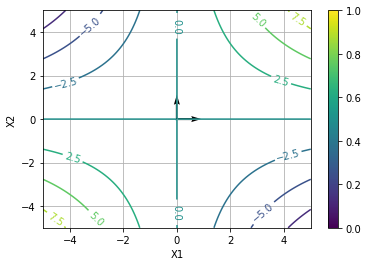

In [87]:
# se grafica las curvas de nivel con los vectores propios asociados 
# a la matriz parametro en este caso U1
b_3(U1)

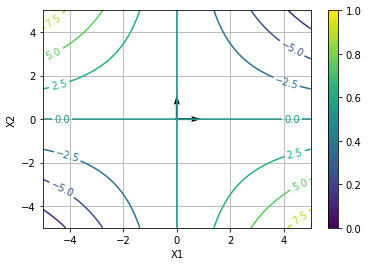

In [88]:
# se grafica las curvas de nivel con los vectores propios asociados 
# a la matriz parametro en este caso U2
b_3(U2)

> Conclusión:
Notese que si corresponden los valores de la función y de las curvas de nivel a sus reciprocos multiplicativos por (-1) de tal forma que esta invirtiendo la función cumpliendo con las restricciones del problema.